In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

### Acessando o banco de dados

In [2]:
conn = sqlite3.connect("desafio-tecnico.db")
cursor = conn.cursor()

In [3]:
cursor.execute('SELECT name from sqlite_master where type= "table"')
cursor.fetchall()

[('accounts',),
 ('address',),
 ('levels',),
 ('charges',),
 ('transactions',),
 ('transaction_type',)]

##### Consultando as tabelas e entendendo os relacionamentos

In [4]:
cursor.execute("SELECT * from accounts LIMIT 5");
cursor.fetchall()

[(1,
  155938,
  '1984-10-29',
  'Outros',
  'mariaceciliaazevedo042@example.com',
  1,
  '2021-04-01 02:30:00'),
 (2,
  747007,
  '1977-03-26',
  'Corretor',
  'ananunes3@example.com',
  2,
  '2021-04-01 02:00:00'),
 (3,
  208404,
  '1984-01-26',
  'Analista',
  'luizfernandovieira@example.com',
  3,
  '2021-04-01 11:30:00'),
 (4,
  66402,
  '1982-06-30',
  'Investidor',
  'gabriellynascimento6@example.com',
  4,
  '2021-04-01 14:30:00'),
 (5,
  277012,
  '1967-01-11',
  'Outros',
  'aliciagoncalves7@example.com',
  5,
  '2021-04-02 15:30:00')]

In [5]:
cursor.execute("SELECT * from address LIMIT 5");
cursor.fetchall()

[(1, 'RJ', 'Carmo', '2021-04-01 02:30:00'),
 (2, 'MG', 'Bertopolis', '2021-04-01 02:00:00'),
 (3, 'MG', 'Olaria', '2021-04-01 11:30:00'),
 (4, 'PR', 'Icaraima', '2021-04-01 14:30:00'),
 (5, 'ES', 'Ecoporanga', '2021-04-02 15:30:00')]

In [6]:
cursor.execute("SELECT * from levels LIMIT 5");
cursor.fetchall()

[(1, 155938, 'F', '2021-04-20 08:00:00'),
 (2, 747007, 'D', '2021-04-19 19:30:00'),
 (4, 66402, 'D', '2021-04-28 21:00:00'),
 (5, 277012, 'D', '2021-04-19 12:00:00'),
 (6, 228213, 'D', '2021-04-26 15:00:00')]

In [7]:
cursor.execute("SELECT * from charges LIMIT 5");
cursor.fetchall()

[(1, 155938, 'paid', 11992, '2021-04-01 03:00:00'),
 (2, 155938, 'paid', 9689, '2021-04-01 13:30:00'),
 (3, 155938, 'paid', 11579, '2021-04-01 11:30:00'),
 (4, 747007, 'unpaid', 3134, '2021-04-02 12:00:00'),
 (5, 747007, 'paid', 3085, '2021-04-02 19:00:00')]

In [8]:
cursor.execute("SELECT * from transactions LIMIT 5");
cursor.fetchall()

[(1, 155938, 1, 11992, '2021-04-01 03:00:00'),
 (2, 155938, 1, 9689, '2021-04-01 13:30:00'),
 (3, 155938, 1, 11579, '2021-04-01 11:30:00'),
 (4, 155938, 3, 11168, '2021-04-01 11:00:00'),
 (5, 155938, 3, 10772, '2021-04-01 21:00:00')]

In [9]:
cursor.execute("SELECT * from transaction_type LIMIT 5");
cursor.fetchall()

[(1, 'boleto_recebido', 'BOLETO RECEBIDO PELO CLIENTE'),
 (2, 'pix_enviado', 'PIX ENVIADO PELO CLIENTE PARA UMA CONTA EXTERNA'),
 (3, 'pix_recebido', 'PIX RECEBIDO PELO CLIENTE')]

In [10]:
cursor.execute('SELECT COUNT(DISTINCT(account_number)) from accounts');
cursor.fetchall()
# 1029 números de contas diferentes

[(1029,)]

In [11]:
cursor.execute('SELECT COUNT(DISTINCT(account_number)) from levels');
cursor.fetchall()
# 926 contas de clientes diferentes. Faltando 103. Sem classificação?

[(926,)]

In [12]:
# 154469 registros de emissões de boletos
cursor.execute('SELECT COUNT(account_number) from charges');
cursor.fetchall()

[(154469,)]

In [13]:
# apenas 880 números de contas diferentes na tabela de emissões de boletos
cursor.execute('SELECT COUNT(DISTINCT(account_number)) from charges');
cursor.fetchall()

[(880,)]

In [14]:
# mais de 256 mil transações efetivadas
cursor.execute('SELECT COUNT(account_number) from transactions');
cursor.fetchall()

[(256227,)]

In [15]:
# apenas 880 contas únicas na tabela de registros de transações
cursor.execute('SELECT COUNT(DISTINCT(account_number)) from transactions');
cursor.fetchall()

[(880,)]

#### Outras consutas de apoio

In [16]:
# quantos cadastros por Estado?
cursor.execute('SELECT COUNT(id), state FROM address GROUP BY state')
cursor.fetchall()

[(50, 'BA'),
 (62, 'ES'),
 (43, 'GO'),
 (261, 'MG'),
 (159, 'PR'),
 (80, 'RJ'),
 (45, 'SC'),
 (47, 'SP')]

In [17]:
# quantidade de contas por classificação
cursor.execute('SELECT COUNT(id), level FROM levels GROUP BY level')
cursor.fetchall()

[(35, 'A'), (75, 'B'), (264, 'C'), (348, 'D'), (204, 'F')]

In [18]:
# Contas com classificação
cursor.execute('SELECT a.account_number, c.level FROM accounts as a \
                INNER JOIN levels as c ON a.account_number == c.account_number \
                ORDER BY a.account_number DESC LIMIT 20')
cursor.fetchall()

[(999828, 'F'),
 (998440, 'F'),
 (998364, 'D'),
 (997838, 'F'),
 (995447, 'B'),
 (993473, 'C'),
 (991500, 'F'),
 (989906, 'F'),
 (989633, 'A'),
 (989281, 'C'),
 (987627, 'D'),
 (987153, 'C'),
 (986453, 'A'),
 (984920, 'C'),
 (984115, 'C'),
 (983735, 'C'),
 (983289, 'F'),
 (982741, 'D'),
 (982296, 'C'),
 (980845, 'F')]

In [19]:
# Contas com e sem classificação
cursor.execute('SELECT a.account_number, c.level FROM accounts as a \
                LEFT JOIN levels as c ON a.account_number == c.account_number\
                ORDER BY a.account_number DESC LIMIT 20')
cursor.fetchall()

[(999828, 'F'),
 (998440, 'F'),
 (998364, 'D'),
 (997838, 'F'),
 (995447, 'B'),
 (993473, 'C'),
 (991500, 'F'),
 (989906, 'F'),
 (989633, 'A'),
 (989281, 'C'),
 (988259, None),
 (987627, 'D'),
 (987153, 'C'),
 (986453, 'A'),
 (984920, 'C'),
 (984115, 'C'),
 (983735, 'C'),
 (983289, 'F'),
 (982741, 'D'),
 (982296, 'C')]

O Join abaixo agrupa as informações das tabelas: account - tabela account_number, levels - coluna level, buscando as contas com e sem classificação.
Também agrupa através do account_number as operações nas tabelas charges - colunas status e value (emissões de boletos realizadas) e transactions - colunas transaction_type_id e value (transações efetivas).<br>
A ideia é utilizar essas variáveis como requisitos de treinamento do modelo de ML.

In [20]:
# Analisando os dados
cursor.execute('SELECT a.account_number as conta, c.level as classificacao,t.status as status, t.value as valor_transacao, tt.transaction_type_id, tt.value as valor_cobranca\
                FROM ((accounts as a\
                LEFT JOIN levels as c ON a.account_number == c.account_number)\
                INNER JOIN charges as t ON a.account_number == t.account_number)\
                INNER JOIN transactions tt ON a.account_number == tt.account_number LIMIT 10')
cursor.fetchall()

[(155938, 'F', 'paid', 11992, 1, 9689),
 (155938, 'F', 'paid', 11992, 1, 9731),
 (155938, 'F', 'paid', 11992, 1, 10169),
 (155938, 'F', 'paid', 11992, 1, 10280),
 (155938, 'F', 'paid', 11992, 1, 10531),
 (155938, 'F', 'paid', 11992, 1, 10584),
 (155938, 'F', 'paid', 11992, 1, 10645),
 (155938, 'F', 'paid', 11992, 1, 10707),
 (155938, 'F', 'paid', 11992, 1, 10823),
 (155938, 'F', 'paid', 11992, 1, 10866)]

In [21]:
# seleção referente a conta 988259, sem valor de classificação.
cursor.execute("SELECT a.account_number as conta, c.level as classificacao,t.status as status, t.value as valor_transacao, tt.transaction_type_id, tt.value as valor_cobranca\
                FROM ((accounts as a\
                LEFT JOIN levels as c ON a.account_number == c.account_number)\
                INNER JOIN charges as t ON a.account_number == t.account_number)\
                INNER JOIN transactions tt ON a.account_number == tt.account_number\
                WHERE a.account_number == 988259 LIMIT 10")
cursor.fetchall()

[(988259, None, 'paid', 7109, 1, 7109),
 (988259, None, 'paid', 7109, 1, 7172),
 (988259, None, 'paid', 7109, 1, 7177),
 (988259, None, 'paid', 7109, 1, 7244),
 (988259, None, 'paid', 7109, 1, 7258),
 (988259, None, 'paid', 7109, 1, 7492),
 (988259, None, 'paid', 7109, 1, 7505),
 (988259, None, 'paid', 7109, 1, 7508),
 (988259, None, 'paid', 7109, 1, 7510),
 (988259, None, 'paid', 7109, 1, 7524)]

Utilizando o terminal e instruções do Sqlite3, foi possível exportar as 6 tabelas no formato csv.<br>
Podemos utilizar várias técnicas, bibliotecas e linguagens de programação para fazer as análises: SQL, Spark e Python com Pandas.
Decidi fazer as análises dos dados utilizando a biblioteca Pandas e Python.<br><br>
A pasta consta 6 arquivos csv, cada uma referente a uma tabela.

In [22]:
d1 = pd.read_csv('1_account.csv')
d1.head()

,id,account_number,occupation,email,address_id,created_at
0,1,155938,Outros,mariaceciliaazevedo042@example.com,1,2021-04-01 02:30:00
1,2,747007,Corretor,ananunes3@example.com,2,2021-04-01 02:00:00
2,3,208404,Analista,luizfernandovieira@example.com,3,2021-04-01 11:30:00
3,4,66402,Investidor,gabriellynascimento6@example.com,4,2021-04-01 14:30:00
4,5,277012,Outros,aliciagoncalves7@example.com,5,2021-04-02 15:30:00


In [23]:
d2 = pd.read_csv('2_address.csv')
d2.head()

,id,state,city
0,1,RJ,Carmo
1,2,MG,Bertopolis
2,3,MG,Olaria
3,4,PR,Icaraima
4,5,ES,Ecoporanga


In [24]:
d3 = pd.read_csv('3_levels.csv')
d3.head()

,id,account_number,level,created_at
0,1,155938,F,2021-04-20 08:00:00
1,2,747007,D,2021-04-19 19:30:00
2,4,66402,D,2021-04-28 21:00:00
3,5,277012,D,2021-04-19 12:00:00
4,6,228213,D,2021-04-26 15:00:00


<AxesSubplot:xlabel='level', ylabel='count'>

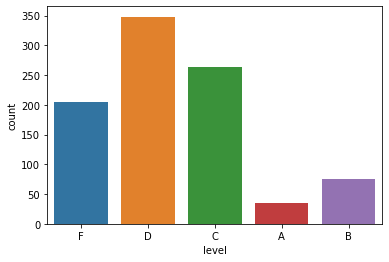

In [25]:
sns.countplot(x=d3['level'])

In [26]:
d4 = pd.read_csv('4_charges.csv')
d4.head()

,id,account_number,status,value,created_at
0,1,155938,paid,11992,2021-04-01 03:00:00
1,2,155939,paid,11993,2021-04-01 03:00:01
2,3,155940,paid,11994,2021-04-01 03:00:02
3,4,155941,paid,11995,2021-04-01 03:00:03
4,5,155942,paid,11996,2021-04-01 03:00:04


<AxesSubplot:xlabel='status', ylabel='count'>

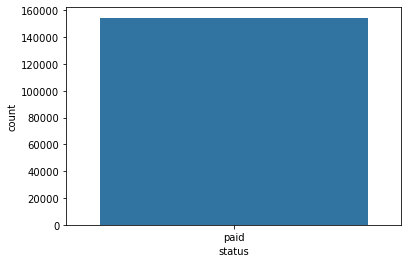

In [27]:
sns.countplot(x=d4['status'])

In [28]:
d5 = pd.read_csv('5_transactions.csv')
d5 = pd.get_dummies(d5, prefix = ['transaction_type_id'], columns = ['transaction_type_id'])
d5.head()

,id,account_number,value,created_at,transaction_type_id_1,transaction_type_id_2,transaction_type_id_3
0,1,155938,11992,2021-04-01 03:00:00,1,0,0
1,2,155938,9689,2021-04-01 13:30:00,1,0,0
2,3,155938,11579,2021-04-01 11:30:00,1,0,0
3,4,155938,11168,2021-04-01 11:00:00,0,0,1
4,5,155938,10772,2021-04-01 21:00:00,0,0,1


In [29]:
d6 = pd.read_csv('6_transaction_type.csv')
d6.head()

,id,description,description_long
0,1,boleto_recebido,BOLETO RECEBIDO PELO CLIENTE
1,2,pix_enviado,PIX ENVIADO PELO CLIENTE PARA UMA CONTA EXTERNA
2,3,pix_recebido,PIX RECEBIDO PELO CLIENTE


## -----------------------------
## Gesrando os dois Datasets: Com e sem classificações

In [30]:
# dataset com contas com classificacao
dat3 = pd.merge(d1,d3, on='account_number')
dat3.drop(['occupation','email','address_id','created_at_x','id_y','created_at_y'], axis=1, inplace=True)
    
# dataset apenas com conta sem classificaçao
dat4 = pd.merge(d1,d3, on='account_number', how = 'left')
dat4_sem_classificacao = dat4.copy()
dat4_sem_classificacao.drop(['occupation','email','address_id','created_at_x','id_y','created_at_y'], axis=1, inplace=True)
dat4_sem_classificacao.loc[dat4.level.isnull(),:]
    
# agrupando com a variável account_number as tabelas dat3 (junção de account com classificação) e charges
dat5 = pd.merge(dat3,d4, on='account_number')
    
#
dat6 = pd.merge(dat5,d5, on='id')
dat6.drop(['status','created_at_x','created_at_y'], axis=1, inplace=True)

In [31]:
dat6.head()

,id_x,account_number_x,level,id,value_x,account_number_y,value_y,transaction_type_id_1,transaction_type_id_2,transaction_type_id_3
0,1,155938,F,1,11992,155938,11992,1,0,0
1,5,277012,D,121075,133066,384771,8091,0,0,1
2,6,228213,D,72276,84267,249793,7340,0,0,1
3,13,222177,F,66240,78231,450789,5117,0,0,1
4,31,253345,A,97408,109399,756365,4366,0,0,1


# Preparando os datasets

### Dataset sem classificação

In [32]:
dat_sem_classificacao = pd.DataFrame(dat4_sem_classificacao.loc[dat4.level.isnull(),:])
dat7 = pd.merge(dat_sem_classificacao,d4, on='account_number')
dat8 = pd.merge(dat7,d5, on='id')
dat8.drop(['status','created_at_x','created_at_y'], axis=1, inplace=True)
dat8.head()
dat9 = dat8.copy()

# Vamos renomear as variáveis e a coluna classificação
dat9.rename(columns={'id_x':'id_x','account_number_x':'num_conta',\
                      'id':'id','value_y':'valor_cobranca','value_x':'valor_transacao',\
                      'account_number_y':'num_conta_y',\
                      'transaction_type_id_1':'boleto_recebido','transaction_type_id_2':'pix_enviado',\
                      'transaction_type_id_3':'pix_recebido','level':'classificacao'}, inplace=True)
dat9 = dat9[['id_x','id','num_conta','num_conta_y','valor_cobranca','valor_transacao',\
             'boleto_recebido','pix_enviado','pix_recebido']]


In [33]:
dat9.head()

,id_x,id,num_conta,num_conta_y,valor_cobranca,valor_transacao,boleto_recebido,pix_enviado,pix_recebido
0,3,52467,208404,8012,5864,64458,1,0,0
1,8,153117,309054,468531,3493,165108,1,0,0
2,86,23330,179267,567530,8772,35321,1,0,0
3,243,113824,269761,221895,5402,125815,0,0,1
4,265,3906,159843,201375,3773,15897,1,0,0


### Dataset com classificação

In [34]:
# Vamos renomear as variáveis e a coluna classificação
dat6.rename(columns={'id_x':'id_x','account_number_x':'num_conta',\
                      'id':'id','value_y':'valor_cobranca','value_x':'valor_transacao',\
                      'account_number_y':'num_conta_y',\
                      'transaction_type_id_1':'boleto_recebido','transaction_type_id_2':'pix_enviado',\
                      'transaction_type_id_3':'pix_recebido','level':'classificacao'}, inplace=True)
dat6 = dat6[['id_x','id','num_conta','num_conta_y','valor_cobranca','valor_transacao',\
             'boleto_recebido','pix_enviado','pix_recebido','classificacao']]
l = []
for x in dat6.classificacao:
    if x == "A":
        l.append(5)
    if x == "B":
        l.append(4)
    if x == "C":
        l.append(3)
    if x == "D":
        l.append(2)
    if x == "F":
        l.append(1)
dat6['classificacao']=l

In [35]:
dat6.head() # dataset com classificação

,id_x,id,num_conta,num_conta_y,valor_cobranca,valor_transacao,boleto_recebido,pix_enviado,pix_recebido,classificacao
0,1,1,155938,155938,11992,11992,1,0,0,1
1,5,121075,277012,384771,8091,133066,0,0,1,2
2,6,72276,228213,249793,7340,84267,0,0,1,2
3,13,66240,222177,450789,5117,78231,0,0,1,1
4,31,97408,253345,756365,4366,109399,0,0,1,5


In [36]:
dat6.classificacao.value_counts()

2    62
3    35
1    25
4     9
5     5
Name: classificacao, dtype: int64

In [37]:
# aplicando valor a variável fraude
l3 = []
for x in dat6.classificacao:
    if x > 1:
        l3.append(0)
    else:
        l3.append(1)
dat6['fraude'] = l3
dat6.head()

,id_x,id,num_conta,num_conta_y,valor_cobranca,valor_transacao,boleto_recebido,pix_enviado,pix_recebido,classificacao,fraude
0,1,1,155938,155938,11992,11992,1,0,0,1,1
1,5,121075,277012,384771,8091,133066,0,0,1,2,0
2,6,72276,228213,249793,7340,84267,0,0,1,2,0
3,13,66240,222177,450789,5117,78231,0,0,1,1,1
4,31,97408,253345,756365,4366,109399,0,0,1,5,0


# Aplicando Machine learning

In [38]:
dat6.head()

,id_x,id,num_conta,num_conta_y,valor_cobranca,valor_transacao,boleto_recebido,pix_enviado,pix_recebido,classificacao,fraude
0,1,1,155938,155938,11992,11992,1,0,0,1,1
1,5,121075,277012,384771,8091,133066,0,0,1,2,0
2,6,72276,228213,249793,7340,84267,0,0,1,2,0
3,13,66240,222177,450789,5117,78231,0,0,1,1,1
4,31,97408,253345,756365,4366,109399,0,0,1,5,0


Para essa prova de conceito básica, serão utilizadas as seguintes variáveis:
<liValor de cobrança></li>

<li>Valor da transação</li>

<li>Boleto recebido</li>

<li>Pix enviado</li>

<li>Pix recebido</li><br>
A variável fraude foi gerada a partir da coluna de classificação, conforme o enunciado da proposta: Quando a classificação for F, o valor será igual a 1 - fraude. Para as demais classificações, valor igual a 0 - não fraude.

### Treinando o modelo

In [39]:
dat6.head(2)

,id_x,id,num_conta,num_conta_y,valor_cobranca,valor_transacao,boleto_recebido,pix_enviado,pix_recebido,classificacao,fraude
0,1,1,155938,155938,11992,11992,1,0,0,1,1
1,5,121075,277012,384771,8091,133066,0,0,1,2,0


In [40]:
dat6.fraude.value_counts()

0    111
1     25
Name: fraude, dtype: int64

### Balanceamento das classes

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
X1 = dat6.iloc[:,[4,5,6,7,8]].values
y1 = dat6.iloc[:,10].values

In [43]:
smote = SMOTE(sampling_strategy='minority')
X, y = smote.fit_resample(X1, y1)

In [44]:
np.unique(y1, return_counts=True), np.unique(y, return_counts=True)

((array([0, 1]), array([111,  25])), (array([0, 1]), array([111, 111])))

In [45]:
#algoritmos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3,random_state=142)

In [49]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((155, 5), (67, 5), (155,), (67,))

In [50]:
#instanciando os modelos
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

#treinando os modelos
logreg.fit(Xtrain, ytrain)
knn.fit(Xtrain, ytrain)
dt.fit(Xtrain, ytrain)

DecisionTreeClassifier()

In [51]:
estimators = [('lr', logreg), ('knn', knn), ('dt', dt)]

for est in estimators:
    model_name = est[0]
    model = est[1]
    acuracia = accuracy_score(y_true = ytest, y_pred = model.predict(Xtest))
    print(model_name, " | acurácia: ", acuracia)

lr  | acurácia:  0.5522388059701493
knn  | acurácia:  0.746268656716418
dt  | acurácia:  0.7910447761194029


In [52]:
from sklearn.ensemble import VotingClassifier

In [53]:
voting = VotingClassifier(estimators = estimators)
voting.fit(Xtrain, ytrain)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier())])

In [54]:
accuracy_score(y_true = ytest, y_pred = voting.predict(Xtest))

0.7910447761194029

### Outras métricas

In [55]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(y_true = ytest, y_pred = voting.predict(Xtest))

array([[35,  2],
       [12, 18]])

In [57]:
print("voting:")
print('Recall: ', recall_score(y_true = ytest, y_pred = voting.predict(Xtest)))
print('Precison: ', precision_score(y_true = ytest, y_pred = voting.predict(Xtest)))
print()

voting:
Recall:  0.6
Precison:  0.9



In [58]:
from sklearn.metrics import f1_score

In [59]:
print('F1 Score - voting":',f1_score(y_true = ytest, y_pred = voting.predict(Xtest)))

F1 Score - voting": 0.7200000000000001


In [60]:
from sklearn.metrics import roc_curve

In [61]:
fpr, tpr, thresholds = roc_curve(y_true = ytest, y_score = voting.predict(Xtest)) 

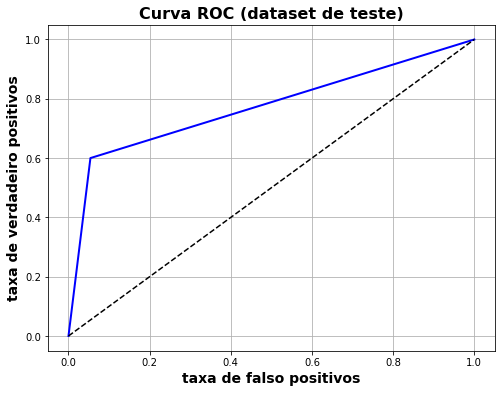

In [62]:
plt.figure(figsize=[8,6])
plt.plot(fpr, tpr, c = 'blue', lw = 2)
plt.title("Curva ROC (dataset de teste)", fontsize = 16, fontweight = 'bold')
plt.xlabel("taxa de falso positivos", fontsize = 14, fontweight = 'bold')
plt.ylabel("taxa de verdadeiro positivos", fontsize = 14, fontweight = 'bold')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.grid()
plt.show()

### Conclusão:

O modelo Voting ajudou a obter um melhor resultado para nossa previsão.<br>
Utilizei várias métricas para avaliar a performance do modelo, se o mesmo está estimando bem os 
resultados.<br>
Observando a métrica acurracy_score o resultado é de 79,0%. <br><br>
Em média levamos 3 meses para realizar um projeto de ciência de dados com ML.<br>
Nesses 5 dias foi possível desemvolver uma prova de conceito bem básica.<br><br>
Para uma maior assertividade do modelo, é necessário sentar com o time de negócios e identificar outras variáveis que sejam interessantes e relevantes para a solução do problema. Também utilizar um maior número de registros possíveis.

### Fazendo previsões no dataset sem classificações

In [63]:
# dat9 é o dataset sem classificação
dat9.drop(['id_x','id','num_conta','num_conta_y'], axis=1, inplace=True) # removendo variáveis sem relevância

In [64]:
dat9.head(2)

,valor_cobranca,valor_transacao,boleto_recebido,pix_enviado,pix_recebido
0,5864,64458,1,0,0
1,3493,165108,1,0,0


In [65]:
X2 = dat9.iloc[:,[0,1,2,3,4]].values

In [66]:
y_pred2 = voting.predict(X2) # fazendo as previsões

In [67]:
dat9['fraude'] = y_pred2

In [68]:
dat9.head(12)

,valor_cobranca,valor_transacao,boleto_recebido,pix_enviado,pix_recebido,fraude
0,5864,64458,1,0,0,0
1,3493,165108,1,0,0,0
2,8772,35321,1,0,0,0
3,5402,125815,0,0,1,0
4,3773,15897,1,0,0,0
5,4107,89927,0,0,1,0
6,84602,79405,0,1,0,0
7,8482,151894,1,0,0,0
8,5251,104501,0,0,1,0
9,5149,102919,1,0,0,0


In [69]:
dat9.fraude.value_counts()

0    12
Name: fraude, dtype: int64

O modelo estimou duas fraudes entre os 12 registros.

### Comando para gerar o arquivo csv com as previsões realizadas no dataset sem classificação

In [70]:
## É só apertar comando Run para gerar o arquivo:
dat10 = dat9.copy()
dat10.to_csv('previsao.csv', index=False)